In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import cv2
from utils import depth2disp

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)

Use a dataset with 2103 instances
Batch size 16
Drop last True
Use a dataset with 13327 instances
Batch size 16
Drop last True
load best True
      Test G: [  2.68376348 229.1119902    0.25786442   0.7909855 ] 232.845(inf) Time: 35.46s [*]


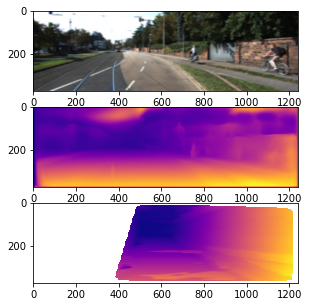

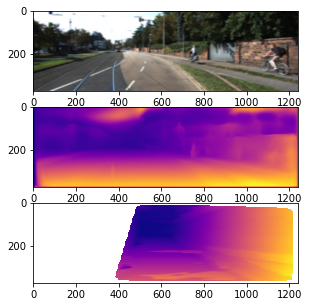

In [2]:
from model import Model

model = Model(
    use_multiple_gpu=False,
    model_path='model_013.final',
    batch_size=16,
    val_dataset_dir='data_depth_annotated/val',
    train_dataset_dir='data_depth_annotated/train',
    input_height=128,
    input_width=256,
    learning_rate=1e-3,
    loss_weights=[1.0, 0.1, 1.0, 1.0] # with supervised loss
)

model.load(True)

fig, ax = plt.subplots(ncols=1, nrows=3)
epochs = 80
idx = 0

disp_est, left, gt = model.test(0)

resized_left = cv2.resize(np.moveaxis(left[idx], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
resized_disp_est = cv2.resize(np.abs(disp_est[idx]), (1242, 375), interpolation=cv2.INTER_LINEAR)
resized_gt = cv2.resize(np.moveaxis(depth2disp(gt[idx]), 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
ax[0].imshow(resized_left)
ax[1].imshow(resized_disp_est, cmap='plasma') 
ax[2].imshow(resized_gt, cmap='plasma')
display.display(plt.gcf())   

In [3]:
# Animation

import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='D:\\ffmpeg-20200814-a762fd2-win64-static\\bin\\ffmpeg.exe'
ims = []

fig, ax = plt.subplots(2, 1)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Ze Ran Lu'), bitrate=1800)

for idx in range(len(left)):
    resized_left = cv2.resize(np.moveaxis(left[idx], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_disp_est = cv2.resize(np.abs(disp_est[idx]), (1242, 375), interpolation=cv2.INTER_LINEAR)
    im0 = ax[0].imshow(resized_disp_est, cmap='plasma', animated=True)
    im1 = ax[1].imshow(resized_left, animated=True)
    ims.append([im0, im1])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('animation.mp4', writer=writer, dpi=300)


KeyboardInterrupt: 